In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import voronoi_2d_binning
from scipy.spatial import Voronoi, voronoi_plot_2d
import time
plt.matplotlib.rcParams['figure.figsize'] = (15,15)
plt.matplotlib.rcParams['font.size'] = 30

In [57]:
#read observation data
os.chdir('C:/Users/marti/Desktop/share/testdata_cut')
dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
y = dp['v'].values[:14000]
x = dp['vi'].values[:14000]*12.5

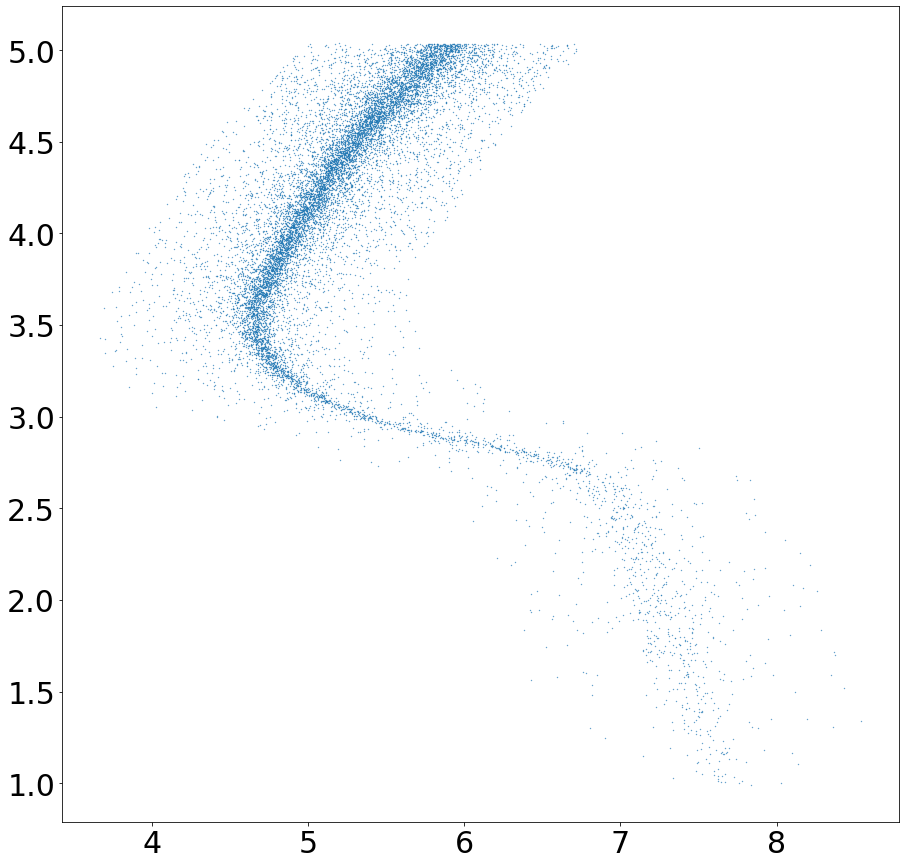

In [15]:
plt.scatter(x,y,s=0.1)

In [16]:
signal = np.array([1]*len(x))
noise = np.array([1]*len(x))

Bin-accretion...
1  /  560
2  /  560
3  /  560
4  /  560
5  /  560
6  /  560
7  /  560
8  /  560
9  /  560
10  /  560
11  /  560
12  /  560
13  /  560
14  /  560
15  /  560
16  /  560
17  /  560
18  /  560
19  /  560
20  /  560
21  /  560
22  /  560
23  /  560
24  /  560
25  /  560
26  /  560
27  /  560
28  /  560
29  /  560
30  /  560
31  /  560
32  /  560
33  /  560
34  /  560
35  /  560
36  /  560
37  /  560
38  /  560
39  /  560
40  /  560
41  /  560
42  /  560
43  /  560
44  /  560
45  /  560
46  /  560
47  /  560
48  /  560
49  /  560
50  /  560
51  /  560
52  /  560
53  /  560
54  /  560
55  /  560
56  /  560
57  /  560
58  /  560
59  /  560
60  /  560
61  /  560
62  /  560
63  /  560
64  /  560
65  /  560
66  /  560
67  /  560
68  /  560
69  /  560
70  /  560
71  /  560
72  /  560
73  /  560
74  /  560
75  /  560
76  /  560
77  /  560
78  /  560
79  /  560
80  /  560
81  /  560
82  /  560
83  /  560
84  /  560
85  /  560
86  /  560
87  /  560
88  /  560
89  /  560
90  /  560
91

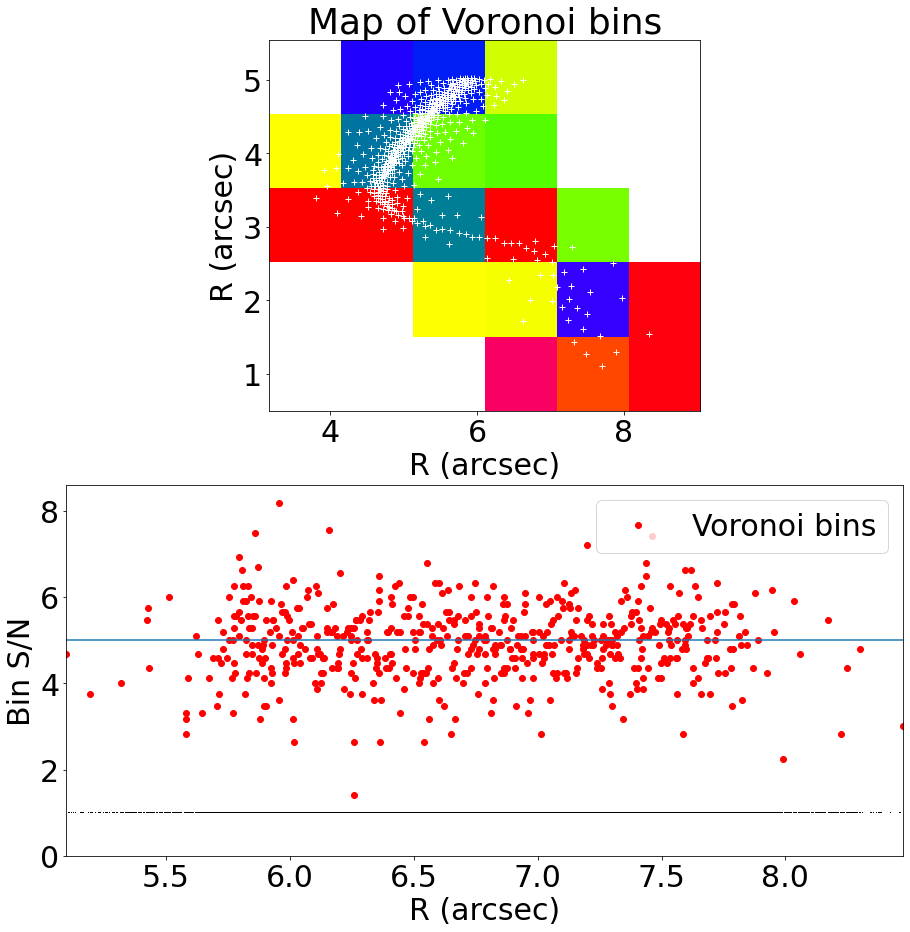

In [17]:
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=0)

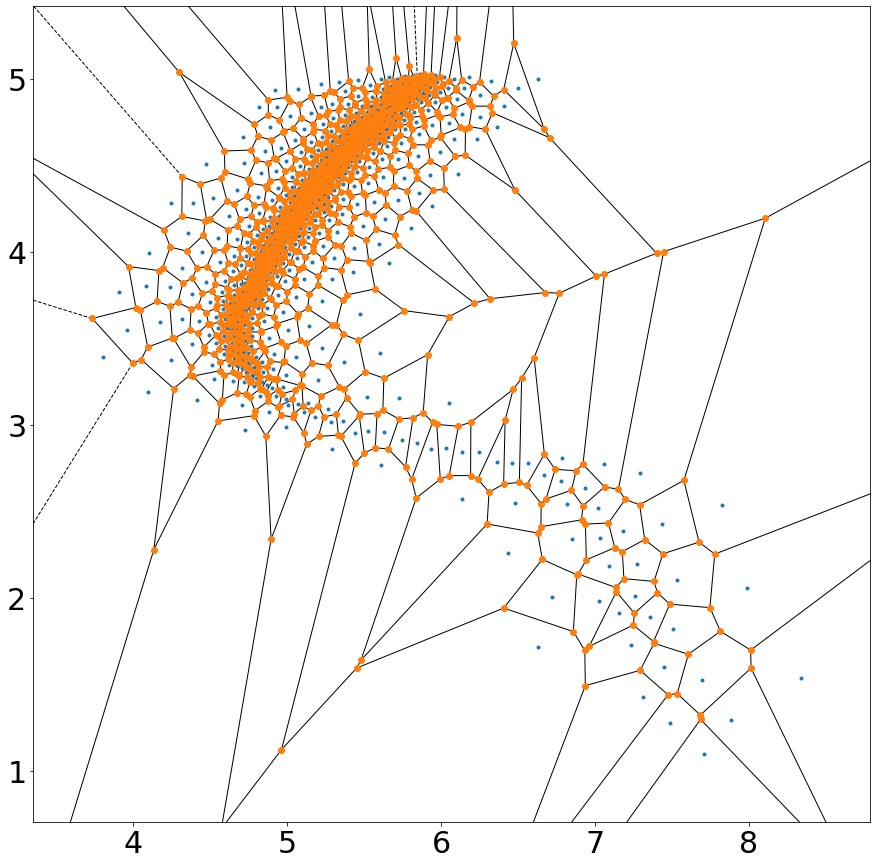

In [18]:
points = np.stack((xBar, yBar), axis=1)
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

In [60]:
#define search
def search_point_location(x, y, xBar, yBar):
    delta_x = [xbar - x for xbar in xBar]
    delta_y = [ybar - y for ybar in yBar]
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance)
    return bin_num

In [71]:
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

In [70]:
#find the standard bin
start = time.time()
bin_count = np.zeros(len(xBar))
bin_num = search_point_location_bc(x[:14000], y[:14000], xBar, yBar)
for i in range(14000):
    bin_count[bin_num[i]] += 1
density_map_standard = bin_count/14000
end = time.time()
print(end - start)

0.12206244468688965


In [ ]:
#find the standard bin
start = time.time()
bin_count = np.zeros(len(xBar))
for i in range(14000):
    bin_num = search_point_location(x[i], y[i], xBar, yBar)
    bin_count[bin_num] += 1
density_map_standard = bin_count/14000
end = time.time()
print(end - start)

In [61]:
#find the standard bin
start = time.time()
bin_count = np.zeros(len(xBar))
for i in range(14000):
    bin_num = search_point_location(x[i], y[i], xBar, yBar)
    bin_count[bin_num] += 1
density_map_standard = bin_count/14000
end = time.time()
print(end - start)

3.141409397125244


In [39]:
import time
start = time.time()
#find chi square for each age
ages = ['09000','10000','11000','12000','13000','14000','15000','16000']
chi2 = []
for age in ages:
    dp = pd.read_csv('mc10000.a{}'.format(age),sep='\s+',names=['vi','v','i'],skiprows=3)
    bin_count = np.zeros(len(xBar))
    total_pt = len(dp)
    for i in range(total_pt):
        bin_num = search_point_location(dp['vi'][i]*12.5, dp['v'][i], xBar, yBar)
        bin_count[bin_num] += 1
    bin_count_over_Expected = np.zeros(len(xBar))
    for i in range(len(bin_count_over_Expected)):
        bin_count_over_Expected[i] = bin_count[i]/(density_map_standard[i]*total_pt)
    chi2.append(np.inner(bin_count - density_map_standard*total_pt, bin_count_over_Expected - 1))
end = time.time()
print(end - start)

4147.559929609299


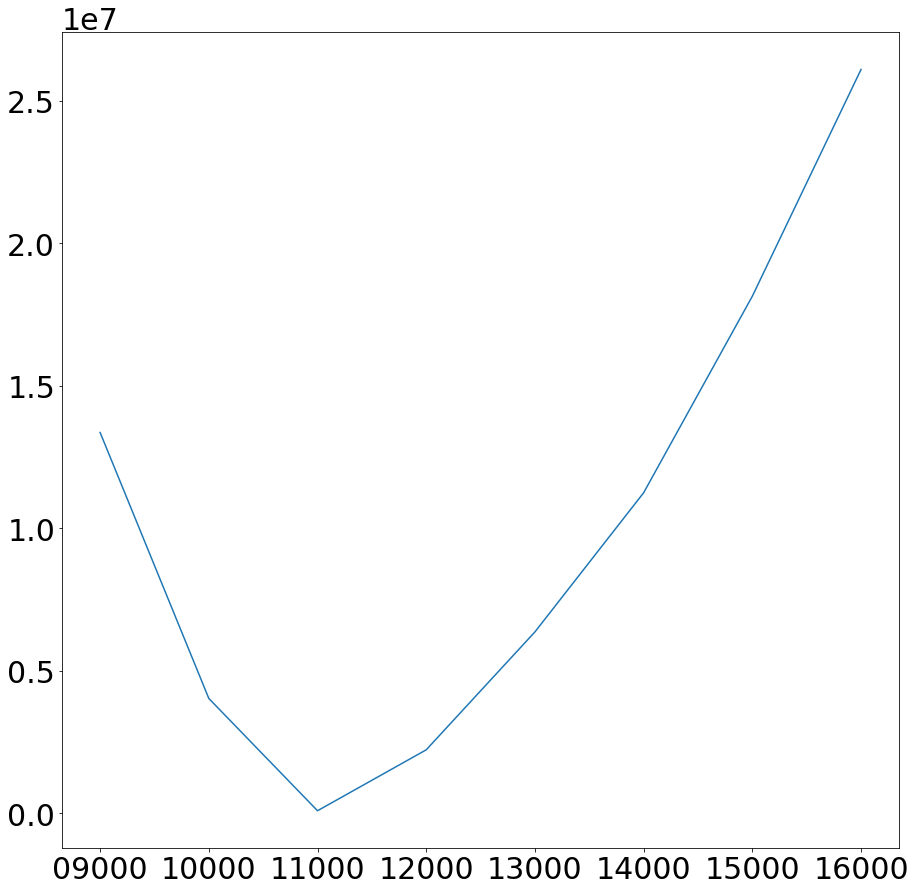

In [40]:
plt.plot(ages,chi2)

In [41]:
chi2

[13363864.506443145,
 4030726.257673595,
 90459.04152829008,
 2227979.8081923635,
 6365994.36617041,
 11248899.030619329,
 18146737.58314607,
 26104076.61926547]

In [36]:
density_map_standard

array([0.00207143, 0.00178571, 0.00171429, 0.00142857, 0.00171429,
       0.00157143, 0.00178571, 0.00171429, 0.00185714, 0.00178571,
       0.00185714, 0.00164286, 0.00214286, 0.00178571, 0.00142857,
       0.0015    , 0.00214286, 0.00135714, 0.00185714, 0.0015    ,
       0.00185714, 0.00257143, 0.00135714, 0.00242857, 0.00271429,
       0.00142857, 0.00185714, 0.00228571, 0.00157143, 0.00142857,
       0.00142857, 0.00192857, 0.00257143, 0.00228571, 0.00107143,
       0.00178571, 0.00128571, 0.00235714, 0.002     , 0.00171429,
       0.00164286, 0.00164286, 0.002     , 0.00235714, 0.00164286,
       0.00178571, 0.00185714, 0.00192857, 0.0025    , 0.00157143,
       0.00242857, 0.00157143, 0.00192857, 0.00164286, 0.00185714,
       0.00192857, 0.00128571, 0.00157143, 0.00114286, 0.00207143,
       0.00157143, 0.00242857, 0.00164286, 0.00257143, 0.00185714,
       0.001     , 0.00107143, 0.00207143, 0.00178571, 0.00192857,
       0.00164286, 0.00178571, 0.00121429, 0.00128571, 0.00164

In [37]:
import time
start = time.time()
#find chi square for each age
ages = ['09000']
chi2 = []
for age in ages:
    dp = pd.read_csv('mc10000.a{}'.format(age),sep='\s+',names=['vi','v','i'],skiprows=3)
    bin_count = np.zeros(len(xBar))
    total_pt = len(dp)
    for i in range(total_pt):
        bin_num = search_point_location(dp['vi'][i]*12.5, dp['v'][i], xBar, yBar)
        bin_count[bin_num] += 1
    bin_count_over_Expected = np.zeros(len(xBar))
    for i in range(len(bin_count_over_Expected)):
        bin_count_over_Expected[i] = bin_count[i]/(density_map_standard[i]*total_pt)
    chi2.append(np.inner(bin_count - density_map_standard*total_pt, bin_count_over_Expected - 1))
end = time.time()
print(end - start)

541.0651640892029


In [38]:
chi2

[13363864.506443145]

In [44]:
dp['vi'].values

array([0.45460796, 0.50922823, 0.44453621, ..., 0.51794338, 0.46617675,
       0.51445293])

In [46]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))
print(x)
print(xx)
print(y)
print(z)

[0 1 2 3]
[[0]
 [1]
 [2]
 [3]]
[1. 1. 1. 1. 1.]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [47]:
xx + y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [62]:
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

In [69]:
start = time.time()
search_point_location_bc(x[:14000], y[:14000], xBar, yBar)
end = time.time()
print(end - start)

0.10155677795410156


In [68]:
start = time.time()
for i in range(14000):
    search_point_location(x[i], y[i], xBar, yBar)
end = time.time()
print(end - start)

3.09941029548645


In [2]:
import time

160.7790470123291


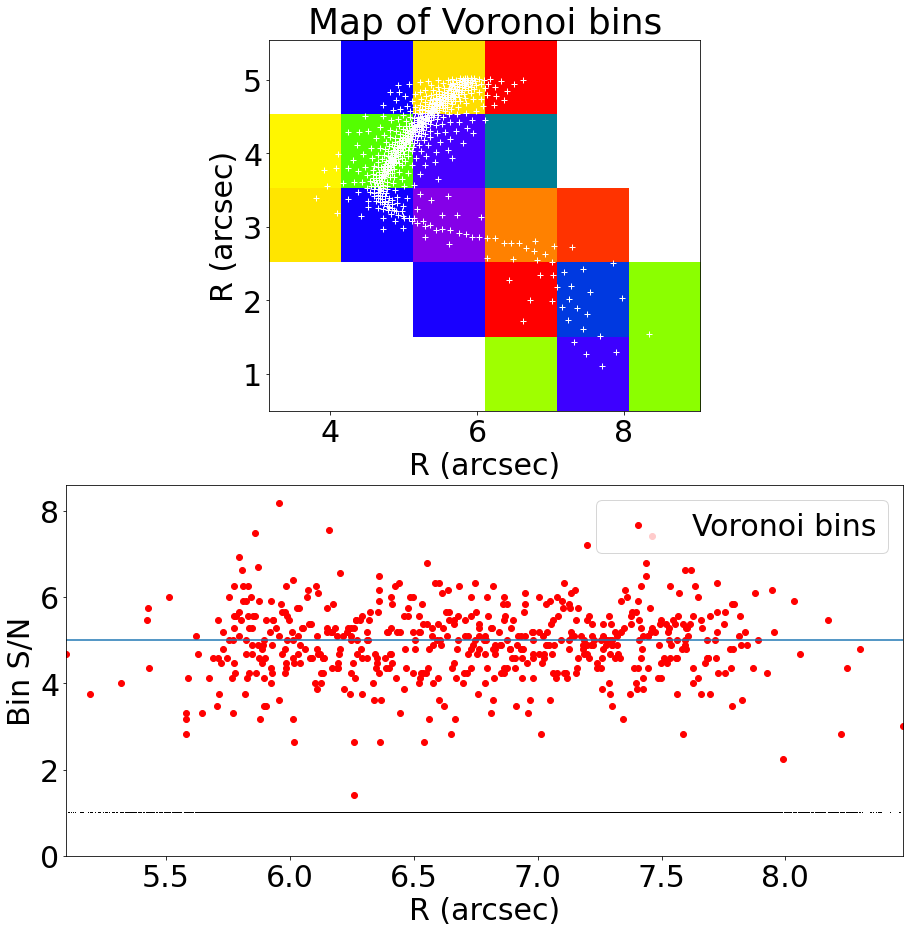

In [12]:
#code in one piece
#read observation data
os.chdir('C:/Users/marti/Desktop/share/testdata_cut')
dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
y = dp['v'].values[:14000]
x = dp['vi'].values[:14000]*12.5

signal = np.array([1]*len(x))
noise = np.array([1]*len(x))

#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=1)

#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
start = time.time()
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x[:14000], y[:14000], xBar, yBar)
for i in range(14000):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
ages = ['09000','10000','11000','12000','13000','14000','15000','16000']
#ages = ['09000']
chi2 = []
for age in ages:
    dp = pd.read_csv('mc10000.a{}'.format(age),sep='\s+',names=['vi','v','i'],skiprows=3)
    bin_count = np.zeros(len(xBar))
    total_pt = len(dp)
    n_div = total_pt // 500000
    for i in range(n_div):
        bin_num = search_point_location_bc(dp['vi'].values[i*500000:(i+1)*500000]*12.5, dp['v'].values[i*500000:(i+1)*500000], xBar, yBar)
        for j in range(500000):
            bin_count[bin_num[j]] += 1
#do the last bit
    bin_num = search_point_location_bc(dp['vi'].values[n_div*500000:]*12.5, dp['v'].values[n_div*500000:], xBar, yBar)
    for j in range(total_pt - n_div*500000):
        bin_count[bin_num[j]] += 1
    density = bin_count/total_pt
    chi2.append(np.inner(np.divide(density*14000,bin_count_std) - 1, density*14000 - bin_count_std))
end = time.time()
print(end - start)

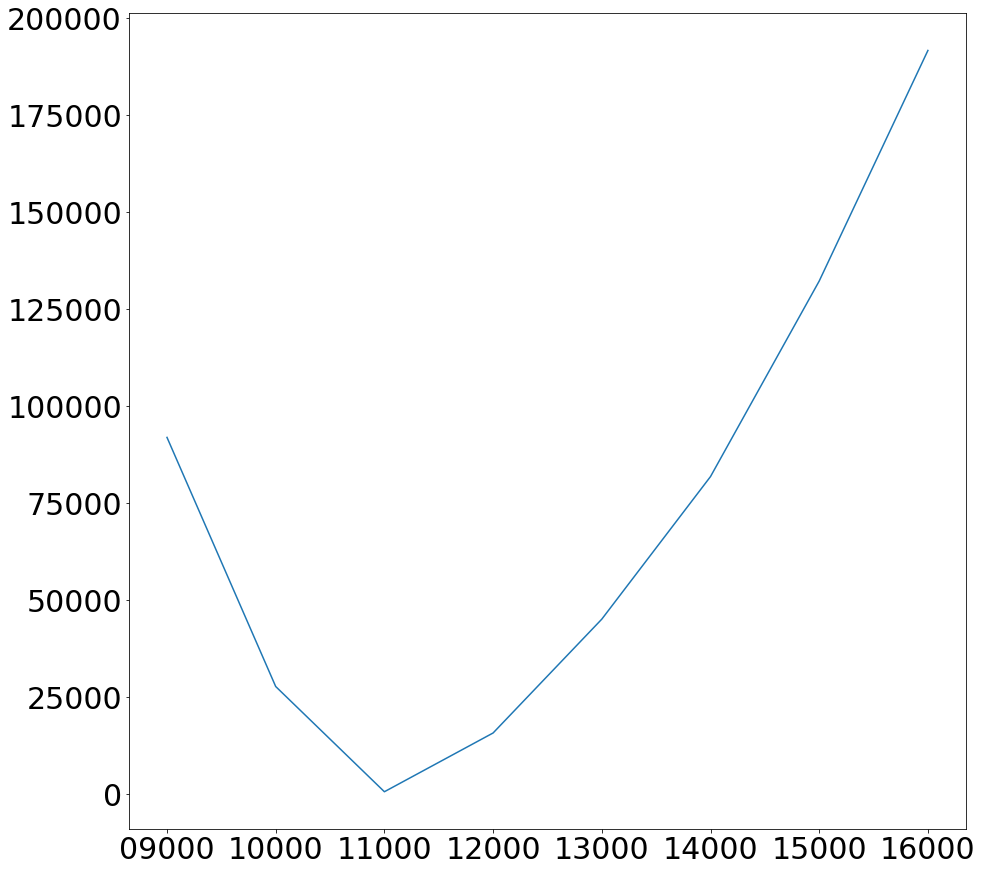

In [13]:
plt.plot(ages,chi2)

In [14]:
chi2

[91942.69744601772,
 27754.33410326682,
 640.2580500224277,
 15781.352676708579,
 45111.94281400986,
 81846.10201811738,
 132230.155230013,
 191642.49974683256]

21.12261390686035


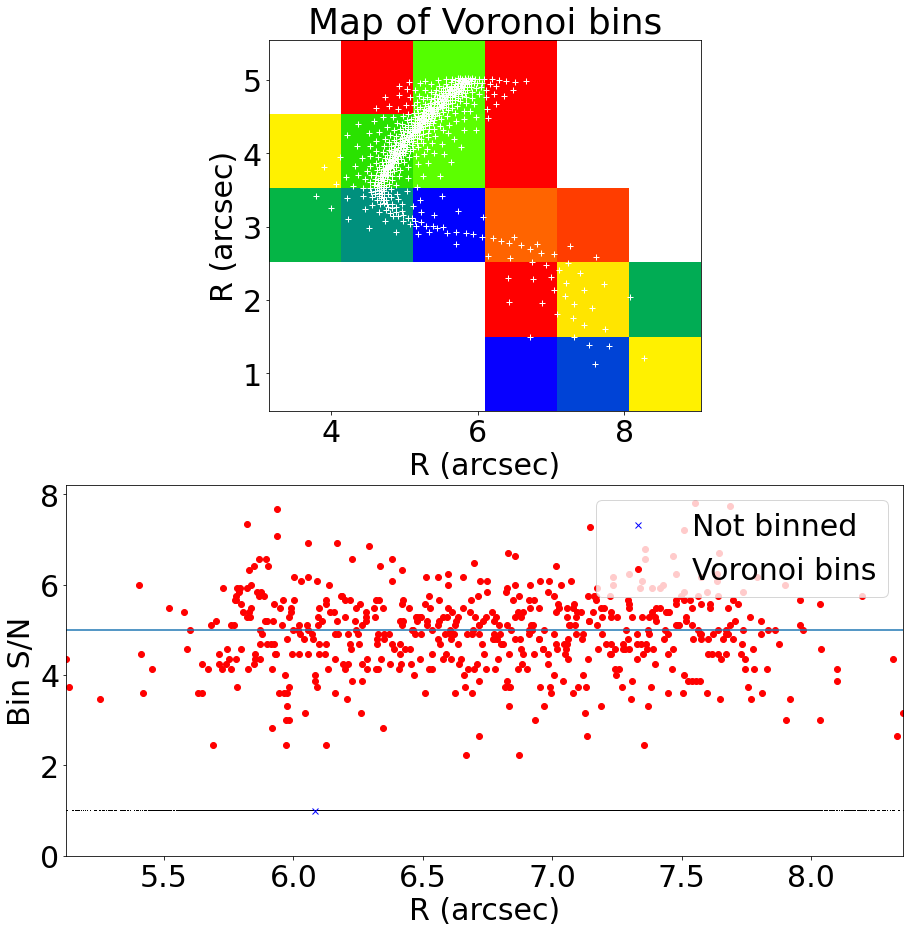

In [6]:
#test run time
#read observation data
os.chdir('C:/Users/marti/Desktop/share/dm_test')
dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
y = dp['v'].values[:14000]
x = dp['vi'].values[:14000]*12.5

signal = np.array([1]*len(x))
noise = np.array([1]*len(x))

#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=1)

#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x[:14000], y[:14000], xBar, yBar)
for i in range(14000):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
start = time.time()
#ages = ['09000','10000','11000','12000','13000','14000','15000','16000']
ages = ['09000']
chi2 = []
for age in ages:
    dp = pd.read_csv('mc10000.a{}'.format(age),sep='\s+',names=['vi','v','i'],skiprows=3)
    bin_count = np.zeros(len(xBar))
    total_pt = len(dp)
    n_div = total_pt // 500000
    for i in range(n_div):
        bin_num = search_point_location_bc(dp['vi'].values[i*500000:(i+1)*500000]*12.5, dp['v'].values[i*500000:(i+1)*500000], xBar, yBar)
        for j in range(500000):
            bin_count[bin_num[j]] += 1
#do the last bit
    bin_num = search_point_location_bc(dp['vi'].values[n_div*500000:]*12.5, dp['v'].values[n_div*500000:], xBar, yBar)
    for j in range(total_pt - n_div*500000):
        bin_count[bin_num[j]] += 1
    density = bin_count/total_pt
    chi2.append(np.inner(np.divide(density*14000,bin_count_std) - 1, density*14000 - bin_count_std))
end = time.time()
print(end - start)

In [7]:
#test run time
#read observation data
os.chdir('C:/Users/marti/Desktop/share/dm_test')
dp = pd.read_csv('mc10000.a11000',sep='\s+',names=['vi','v','i'],skiprows=3)
y = dp['v'].values[:14000]
x = dp['vi'].values[:14000]*12.5

signal = np.array([1]*len(x))
noise = np.array([1]*len(x))

#vorbin
targetSN = 5
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(
        x, y, signal, noise, targetSN, plot=1, quiet=1)

#search for bin number for each data point
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

#started with the simulated 14000 data points
bin_count_std = np.zeros(len(xBar))
bin_num = search_point_location_bc(x[:14000], y[:14000], xBar, yBar)
for i in range(14000):
    bin_count_std[bin_num[i]] += 1
    
#go through each files to calculate chi2 = \sum_i (O_i - E_i)^2/E_i
start = time.time()
#ages = ['09000','10000','11000','12000','13000','14000','15000','16000']
ages = ['09000']
chi2 = []
for age in ages:
    dp = pd.read_csv('mc10000.a{}'.format(ageC:/Users/marti/Desktop/share/dm_test),sep='\s+',names=['vi','v','i'],skiprows=3)
    bin_count = np.zeros(len(xBar))
    total_pt = len(dp)
    n_div = total_pt // 50000
    for i in range(n_div):
        bin_num = search_point_location_bc(dp['vi'].values[i*50000:(i+1)*50000]*12.5, dp['v'].values[i*50000:(i+1)*50000], xBar, yBar)
        for j in range(50000):
            bin_count[bin_num[j]] += 1
#do the last bit
    bin_num = search_point_location_bc(dp['vi'].values[n_div*50000:]*12.5, dp['v'].values[n_div*50000:], xBar, yBar)
    for j in range(total_pt - n_div*50000):
        bin_count[bin_num[j]] += 1
    density = bin_count/total_pt
    chi2.append(np.inner(np.divide(density*14000,bin_count_std) - 1, density*14000 - bin_count_std))
end = time.time()
print(end - start)

SyntaxError: invalid syntax (Temp/ipykernel_2668/1178177670.py, line 37)